In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/task2-checkthat25/task2/data/.gitkeep
/kaggle/input/task2-checkthat25/task2/data/test/test-tha.csv
/kaggle/input/task2-checkthat25/task2/data/test/test-ces.csv
/kaggle/input/task2-checkthat25/task2/data/test/test-pa.csv
/kaggle/input/task2-checkthat25/task2/data/test/test-mr.csv
/kaggle/input/task2-checkthat25/task2/data/test/test-spa.csv
/kaggle/input/task2-checkthat25/task2/data/test/test-bn.csv
/kaggle/input/task2-checkthat25/task2/data/test/test-kor.csv
/kaggle/input/task2-checkthat25/task2/data/test/test-hi.csv
/kaggle/input/task2-checkthat25/task2/data/test/test-fra.csv
/kaggle/input/task2-checkthat25/task2/data/test/test-nld.csv
/kaggle/input/task2-checkthat25/task2/data/test/test-por.csv
/kaggle/input/task2-checkthat25/task2/data/test/test-ara.csv
/kaggle/input/task2-checkthat25/task2/data/test/test-pol.csv
/kaggle/input/task2-checkthat25/task2/data/test/test-eng.csv
/kaggle/input/task2-checkthat25/task2/data/test/.gitkeep
/kaggle/input/task2-checkthat25/task2/dat

In [2]:
!python -m bitsandbytes

/usr/bin/python3: No module named bitsandbytes


In [3]:
!pip uninstall bitsandbytes -y  # Remove any existing installation


In [4]:
import os
# Set CUDA_VISIBLE_DEVICES before any imports that might initialize CUDA
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [5]:
# !pip install transformers==4.51.3
# !pip install torch==2.1.0+cu121 --index-url https://download.pytorch.org/whl/cu121
# !pip install bitsandbytes==0.45.2

In [6]:
!pip install peft
!pip install transformers
!pip install accelerate
# !pip install bitsandbytes


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 14.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.3 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found existing installation: nvidia-curand-cu12 10.3.9.90
    Uninstalling nvidia-curand-cu12-1

In [7]:
!pip install torch  pandas datasets evaluate 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.12.0 which is incompatible.
bigframes 1.36.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.


In [8]:
# !pip uninstall bitsandbytes -y  # Remove any existing installation
# !pip install -U bitsandbytes  # Reinstall the latest version

In [9]:
import torch
import pandas as pd
from transformers import AutoTokenizer, AutoModelForCausalLM, TrainingArguments, Trainer
from datasets import Dataset
from peft import LoraConfig, get_peft_model, prepare_model_for_kbit_training
from evaluate import load

2025-05-08 20:44:05.344420: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746737045.572054      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746737045.634208      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [8]:
import pandas as pd


In [9]:
# Configuration
MODEL_NAME = "meta-llama/Llama-3.2-1B"  # Placeholder; update with your model path
OUTPUT_DIR = "./finetuned_llama1b_checkthat2025_task2"
TRAIN_DATA_PATH = "/kaggle/input/task2-checkthat25/task2/data/train/train-eng.csv"  # Combined training data for languages with all splits
DEV_DATA_PATH = "/kaggle/input/task2-checkthat25/task2/data/dev/dev-eng.csv"  # Combined dev data
TEST_DATA_PATH = "/kaggle/input/task2-checkthat25/task2/data/test/test-eng.csv"  # Combined test data (only post column)
BATCH_SIZE = 1  # Small batch size to avoid OOM
EPOCHS = 5
LEARNING_RATE = 2e-5
MAX_LENGTH = 512
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
SHUFFLE_SEED=42


NameError: name 'torch' is not defined

In [11]:
!pip install huggingface_hub

In [ ]:
from huggingface_hub import login

# Log in to Hugging Face
# Replace with your Hugging Face token
HF_TOKEN = "ENTER YOUR API KEY HERE"  # Your Hugging Face token
login(HF_TOKEN)
print("Logged in to Hugging Face successfully")


Logged in to Hugging Face successfully


In [ ]:
# !pip install -U bitsandbytes
# !pip install  #

In [14]:
from transformers import BitsAndBytesConfig

In [15]:
# try:
#     import bitsandbytes
#     print(f"bitsandbytes version: {bitsandbytes.__version__}")
# except ImportError:
#     print("bitsandbytes is not installed or not found in this environment.")

In [16]:
# !pip install -U bitsandbytes

In [17]:
import torch
print(torch.cuda.is_available())
print(torch.version.cuda)


True
12.4


In [18]:
# !pip uninstall bitsandbytes -y

In [19]:
# !pip install bitsandbytes==0.40.0

In [20]:
!pip install bitsandbytes --version

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 23.1 MB/s eta 0:00:00:00:0100:01


In [26]:
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
tokenizer.pad_token = tokenizer.eos_token  # Set pad token for LLaMA

tokenizer_config.json:   0%|          | 0.00/50.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

In [22]:
# !pip install -U bitsandbytes
#Quantization configuration (4-bit)
quant_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_use_double_quant=True
)

# Load tokenizer and model with quantization

model = AutoModelForCausalLM.from_pretrained(
    MODEL_NAME,
    torch_dtype=torch.float16,
    device_map={"": torch.cuda.current_device()},
    # device_map="auto",
    config= quant_config
)

# Explicitly set use_cache=False to suppress warning and ensure compatibility with gradient checkpointing
model.config.use_cache = False
# Prepare model for 4-bit training
model = prepare_model_for_kbit_training(model)

tokenizer_config.json:   0%|          | 0.00/50.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/843 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.47G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/185 [00:00<?, ?B/s]

In [23]:
# Apply LoRA for efficient fine-tuning
lora_config = LoraConfig(
    r=16,
    lora_alpha=32,
    target_modules=["q_proj", "v_proj"],
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM"
)
model = get_peft_model(model, lora_config)


# Ensure model is on the correct device
model.to(DEVICE)

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): LlamaForCausalLM(
      (model): LlamaModel(
        (embed_tokens): Embedding(128256, 2048)
        (layers): ModuleList(
          (0-15): 16 x LlamaDecoderLayer(
            (self_attn): LlamaAttention(
              (q_proj): lora.Linear(
                (base_layer): Linear(in_features=2048, out_features=2048, bias=False)
                (lora_dropout): ModuleDict(
                  (default): Dropout(p=0.05, inplace=False)
                )
                (lora_A): ModuleDict(
                  (default): Linear(in_features=2048, out_features=16, bias=False)
                )
                (lora_B): ModuleDict(
                  (default): Linear(in_features=16, out_features=2048, bias=False)
                )
                (lora_embedding_A): ParameterDict()
                (lora_embedding_B): ParameterDict()
                (lora_magnitude_vector): ModuleDict()
              )
              (k_proj): Linear(in_f

In [4]:
# Data preprocessing
def preprocess_data(df):
    def clean_text(text):
        import re
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        text = re.sub(r'#\w+', '', text)
        text = re.sub(r'[^\w\s]', '', text)
        return text.strip()

    df['post'] = df['post'].apply(clean_text)
    if 'normalized_claim' in df.columns:
        df['normalized_claim'] = df['normalized_claim'].apply(clean_text)
    return df

In [40]:
!pip install langdetect deep_translator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.9 MB/s eta 0:00:0000:010:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.7 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=fc4d6f4e96fbbfca2777cb5eeade785db8b931f5108f1703ab6ed3afa9597859
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [41]:
import re
from langdetect import detect
from langdetect import DetectorFactory
from deep_translator import GoogleTranslator

DetectorFactory.seed = 0  # Set seed for reproducibility


# Function to translate text to English
def translate_to_english(text):
    if pd.isna(text) or text.strip() == "":
        return text
    lang = detect_language(text)
    if lang != 'en':
        try:
            translator = GoogleTranslator(source=lang, target='en')
            translated_text = translator.translate(text)
            return translated_text if translated_text else text
        except Exception as e:
            print(f"Translation failed for text: {text}. Error: {e}")
            return text
    return text



# Function to clean and deduplicate text
def clean_text_deduplicate(text):
    if pd.isna(text):
        return ""
    # Remove extra whitespace and normalize
    text = ' '.join(text.split())
    # Split into sentences and remove duplicates
    sentences = text.split('. ')
    sentences = [s.strip() for s in sentences if s.strip()]
    unique_sentences = []
    seen = set()
    for s in sentences:
        if s not in seen:
            seen.add(s)
            unique_sentences.append(s)
    # Join back with proper punctuation
    return '. '.join(unique_sentences) + ('.' if text.endswith('.') else '')

# Function to detect and filter non-English text
# Function to detect English with fallback
def is_english(text, threshold=0.9):
    if pd.isna(text) or len(text.strip()) < 10:  # Minimum length check
        return True  # Assume English for very short texts to avoid loss
    try:
        detector = detect(text)
        return detector == 'en'
    except:
        return False  # Fallback to False if detection fails



In [42]:
# Load and prepare training data
train_df = pd.read_csv(TRAIN_DATA_PATH)

# Apply preprocessing
train_df = preprocess_data(train_df)

# # Remove rows where both 'post' and 'normalized claim' are empty
# train_df = train_df[(train_df['post'] != '') | (df['normalized claim'] != '')]


In [43]:
# Apply deduplication and further cleaning to 'post' column
train_df['post'] = train_df['post'].apply(clean_text_deduplicate)

# Apply deduplication and further cleaning to 'normalized claim' column
train_df['normalized claim'] = train_df['normalized claim'].apply(clean_text_deduplicate)


In [44]:
#Filter out non-English posts
train_df = train_df[train_df['post'].apply(lambda x: is_english(x) if pd.notna(x) else False)]


In [45]:
train_df.shape

(10625, 2)

In [26]:
# Filter for languages with train, dev, and test sets (exclude ces, ell, kor, nld, ron)
# valid_languages = ['ara', 'deu', 'eng', 'fra', 'hi', 'mr', 'msa', 'pa', 'pol', 'por', 'spa', 'ta', 'tha', 'bn']
# train_df = train_df[train_df['language'].isin(valid_languages)]

In [23]:
# Create prompt-response pairs for training
def create_prompt(row):
    return f"### Instruction: Summarize the following text by identifying the central assertion in a concise, factual statement:\n\n{row['post']}\n\n### Response:\n{row['normalized claim']}"

train_df['text'] = train_df.apply(create_prompt, axis=1)
train_dataset = Dataset.from_pandas(train_df[['text']])

In [24]:
print("First few entries before shuffling:", train_dataset[:3]['text'])

# Shuffle the dataset explicitly
train_dataset = train_dataset.shuffle(seed=SHUFFLE_SEED)
print("Training dataset shuffled with seed:", SHUFFLE_SEED)

print("First few entries after shuffling:", train_dataset[:3]['text'])

First few entries before shuffling: ['### Instruction: Summarize the following text by identifying the central assertion in a concise, factual statement:\n\nLieutenant Retired General Asif Mumtaz appointed as Chairman Pakistan Medical Commission PMC Lieutenant Retired General Asif Mumtaz appointed as Chairman Pakistan Medical Commission PMC Lieutenant Retired General Asif Mumtaz appointed as Chairman Pakistan Medical Commission PMC None\n\n### Response:\nPakistani government appoints former army general to head medical regulatory body', '### Instruction: Summarize the following text by identifying the central assertion in a concise, factual statement:\n\nA priceless clip of 1970 of Bruce Lee playing Table Tennis with his Nanchak  His focus on speed A priceless clip of 1970 of Bruce Lee playing Table Tennis with his Nanchak  His focus on speed A priceless clip of 1970 of Bruce Lee playing Table Tennis with his Nanchak  His focus on speed None\n\n### Response:\nLate actor and martial art

In [27]:
# Tokenize dataset and include labels
# Tokenize dataset and include labels
def tokenize_function(examples):
    # Tokenize the text
    tokenized = tokenizer(
        examples['text'],
        padding="max_length",
        truncation=True,
        max_length=MAX_LENGTH,
        return_tensors="pt"
    )
    # For causal language modeling, labels are the same as input_ids
    # The Trainer will handle shifting the labels for next-token prediction
    tokenized["labels"] = tokenized["input_ids"].clone()
    return tokenized

train_dataset = train_dataset.map(tokenize_function, batched=True)
train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

Map:   0%|          | 0/11374 [00:00<?, ? examples/s]

In [28]:
# Define training arguments
training_args = TrainingArguments(
    output_dir=OUTPUT_DIR,
    num_train_epochs=EPOCHS,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    gradient_accumulation_steps=4,
    learning_rate=LEARNING_RATE,
    lr_scheduler_type="linear",
    weight_decay=0.05,
    fp16=True,
    logging_dir="./logs",
    logging_steps=10,
    save_strategy="steps",  # Changed to save every few steps
    save_steps=500,  # Save every 500 steps
    save_total_limit=1,
    report_to="none",
    overwrite_output_dir=True
)

# Initialize trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset
)

NameError: name 'model' is not defined

In [31]:
model.gradient_checkpointing_enable(gradient_checkpointing_kwargs={"use_reentrant": False})

In [32]:
from accelerate import Accelerator
accelerator = Accelerator(
    device_placement=True,
    cpu=False,
    mixed_precision="fp16",
)
model, trainer = accelerator.prepare(model, trainer)

In [33]:
# Fine-tune the model
trainer.train()

# Save the fine-tuned model
trainer.save_model(OUTPUT_DIR)
tokenizer.save_pretrained(OUTPUT_DIR)
print(f"Fine-tuned model saved to {OUTPUT_DIR}")

Step,Training Loss
10,7.678400
20,6.360900
30,4.374700
40,2.467300
50,1.310700
60,0.859100
70,0.935800
80,0.726700
90,0.925200
100,0.735700


Fine-tuned model saved to ./finetuned_llama1b_checkthat2025_task2


Epoch-wise training loss plot saved to training_loss_epoch.png
Step-wise training loss plot saved to training_loss_step.png


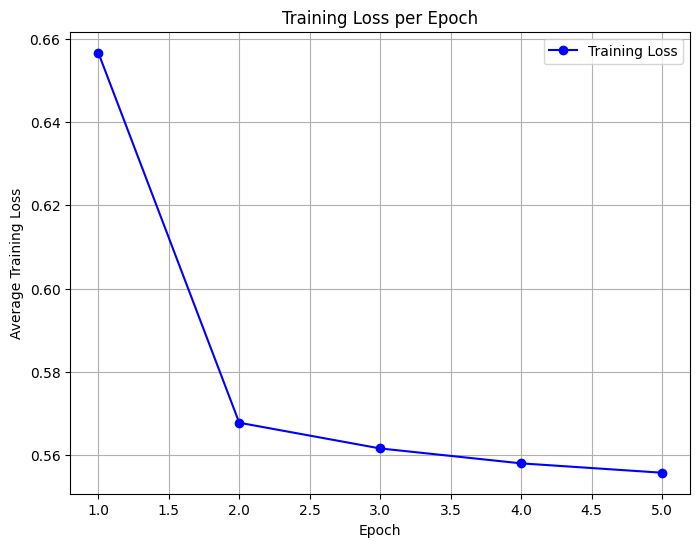

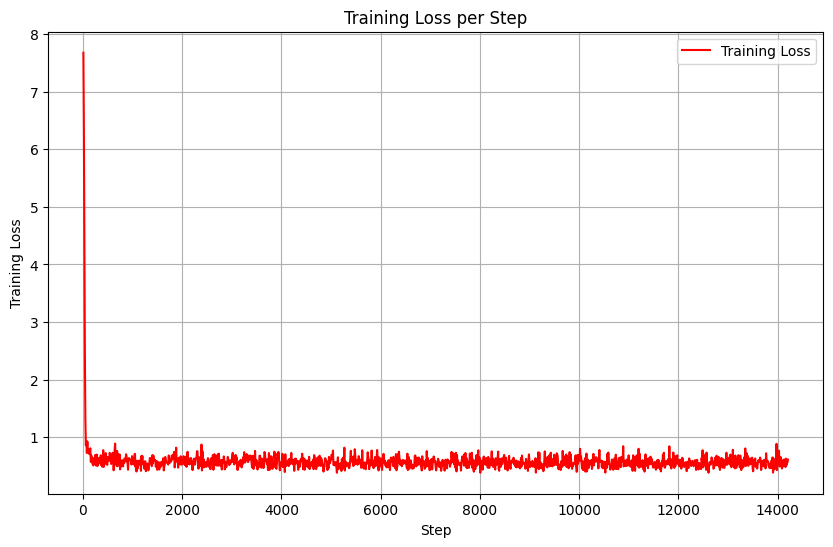

In [35]:
import matplotlib.pyplot as plt

# Plot training loss (epoch-wise and step-wise)
log_history = trainer.state.log_history
epoch_losses = {}
step_losses = []
steps = []

# Extract step-wise and epoch-wise losses
for log in log_history:
    if 'loss' in log and 'step' in log:
        step = log['step']
        loss = log['loss']
        steps.append(step)
        step_losses.append(loss)
        # Aggregate for epoch-wise loss
        epoch = int(log.get('epoch', 0))
        if epoch not in epoch_losses:
            epoch_losses[epoch] = []
        epoch_losses[epoch].append(loss)

# Compute average loss per epoch
avg_epoch_losses = [np.mean(losses) for epoch, losses in sorted(epoch_losses.items())]

# Plot epoch-wise loss
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(avg_epoch_losses) + 1), avg_epoch_losses, marker='o', linestyle='-', color='b', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Average Training Loss')
plt.title('Training Loss per Epoch')
plt.grid(True)
plt.legend()
plt.savefig('training_loss_epoch.png')
print("Epoch-wise training loss plot saved to training_loss_epoch.png")

# Plot step-wise loss
plt.figure(figsize=(10, 6))
plt.plot(steps, step_losses, linestyle='-', color='r', label='Training Loss')
plt.xlabel('Step')
plt.ylabel('Training Loss')
plt.title('Training Loss per Step')
plt.grid(True)
plt.legend()
plt.savefig('training_loss_step.png')
print("Step-wise training loss plot saved to training_loss_step.png")

In [29]:
# Load fine-tuned model for inference
model = AutoModelForCausalLM.from_pretrained(
    OUTPUT_DIR,
    device_map="auto",
    torch_dtype=torch.float16
)
model.eval()

config.json:   0%|          | 0.00/843 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.47G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/185 [00:00<?, ?B/s]

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(128256, 2048)
    (layers): ModuleList(
      (0-15): 16 x LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): lora.Linear(
            (base_layer): Linear(in_features=2048, out_features=2048, bias=False)
            (lora_dropout): ModuleDict(
              (default): Dropout(p=0.05, inplace=False)
            )
            (lora_A): ModuleDict(
              (default): Linear(in_features=2048, out_features=16, bias=False)
            )
            (lora_B): ModuleDict(
              (default): Linear(in_features=16, out_features=2048, bias=False)
            )
            (lora_embedding_A): ParameterDict()
            (lora_embedding_B): ParameterDict()
            (lora_magnitude_vector): ModuleDict()
          )
          (k_proj): Linear(in_features=2048, out_features=512, bias=False)
          (v_proj): lora.Linear(
            (base_layer): Linear(in_features=2048, out_features=512, 

In [32]:
# Inference function with prompting
def generate_normalized_claim(post):
    prompt = f"### Instruction: Summarize the following text by identifying the central assertion in a concise, factual statement:\n\n{post}\n\n### Response:\n"
    inputs = tokenizer(prompt, return_tensors="pt", padding=True, truncation=True, max_length=MAX_LENGTH).to("cuda")
    with torch.no_grad():
        outputs = model.generate(
            inputs["input_ids"],
            max_new_tokens=120,
            num_beams=5,
            temperature=0.6,
            eos_token_id=tokenizer.eos_token_id,
            pad_token_id=tokenizer.pad_token_id
        )
    prediction = tokenizer.decode(outputs[0], skip_special_tokens=True)
    response = prediction.split("### Response:")[-1].strip()
    torch.cuda.empty_cache()
    return response

In [33]:
# Evaluate on dev set
dev_df = pd.read_csv(DEV_DATA_PATH)
dev_df = preprocess_data(dev_df)
# dev_df = dev_df[dev_df['language'].isin(valid_languages)]  # Filter for valid languages

In [34]:
dev_df.head()

,post,normalized claim
0,The Karnofsky Jewish family who immigrated to ...,Photo shows Louis Armstrong as a child
1,Trophy hunting is horrific Trophy hunting is ...,This leopard cub's mother was killed by a trop...
2,Magarmacch Heavy Rain Hyderabad Crocodile Al...,Videos show current situation of Hyderabad ami...
3,The salary of a US Senator is 174000 per year ...,Joe Biden lives in a large estate bought on a ...
4,BREAKING NEWS HUGE Explosion and chaos outsid...,"Photo shows August 26, 2021 explosion near Kab..."


In [35]:
# Generate predictions for dev data
# dev_predictions = []
# model.to("cuda")
# model = model.half()  # Use FP16
# for post in dev_df['post']:
#     pred = generate_normalized_claim(post)
#     dev_predictions.append(pred)

from tqdm import tqdm

# Generate predictions for dev data with progress bar
dev_predictions = []
model.to("cuda")
model = model.half()  # Use FP16

for post in tqdm(dev_df['post'], desc="Generating predictions",unit="post"):
    pred = generate_normalized_claim(post)
    dev_predictions.append(pred)


Generating predictions: 100%|██████████| 1171/1171 [20:25<00:00,  1.05s/post]


In [41]:
print(dev_predictions[:15])

['A Jewish family adopted a 7-year-old boy in the 1930s', 'Trophy hunting is horrific. This little guy was rescued after his mother was murdered by a hunter. His eyes say it all, don’t you think?', 'Video shows crocodile in heavy rain in Hyderabad, Telangana', "Joe Biden's $174,000-a-year salary", 'US State Department warned Americans to leave Afghanistan in April 2021', 'White South Africans own 22% of the land in South Africa, while 78% is owned by black people', 'Amitabh Bachchan has tested positive for Covid-19', 'Publix stopped selling Ben & Jerry’s ice cream', 'Hydroxychloroquine was a kook theory from a kook president', 'The claim: The claim: The claim: The claim: The claim: The claim:\nThe claim: The claim: The claim: The claim: The claim: The claim:\nThe claim: The claim: The claim: The claim: The claim: The claim: The claim:\nThe claim: The claim: The claim: The claim: The claim: The claim: The claim:\nThe claim: The claim: The claim: The claim: The claim: The claim: The clai

In [42]:
print(refs[:15])

['Photo shows Louis Armstrong as a child', "This leopard cub's mother was killed by a trophy hunter", 'Videos show current situation of Hyderabad amid heavy rain', "Joe Biden lives in a large estate bought on a senator's salary", 'Photo shows August 26, 2021 explosion near Kabul airport', 'White people own only 22 percent of South Africa’s land', 'This video shows Amitabh Bachchan thanking healthcare workers after he was hospitalised for COVID-19 in July 2020', "Publix supermarket chain will stop carrying Ben & Jerry's", 'American Medical Association Rescinds Previous Statement Against Prescription of Hydroxychloroquine to COVID-19 Patients.', 'Brazilains participating in India’s nationwide COVID-19 candle light vigil, which Indian Prime Minister Narendra Modi called for on April 3, 2020.', 'Cars melt due to hot weather in Saudi Arabia', 'Photo shows Sri Lankan police during a drug bust operation that turned violent in Atulugama in September 2020', 'Accurate description of photos showi

In [37]:
# Compute METEOR score on dev set
meteor_metric = load("meteor")
refs = dev_df['normalized claim'].tolist()
meteor_score = meteor_metric.compute(predictions=dev_predictions, references=refs)['meteor']
print(f"METEOR Score on Dev Set: {meteor_score}")

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


METEOR Score on Dev Set: 0.31896795048647336


In [44]:
# # Save dev predictions for inspection
dev_df['predicted_normalized_claim'] = dev_predictions
dev_df.to_csv("llama_dev_predictions.csv", index=False)
print("Dev predictions saved to dev_predictions.csv")
print("Sample dev predictions:")
for i in range(min(5, len(dev_df))):
    print(f"Post: {dev_df['post'].iloc[i]}")
    print(f"Predicted Normalized Claim: {dev_df['predicted_normalized_claim'].iloc[i]}")
    print(f"Reference Normalized Claim: {dev_df['normalized_claim'].iloc[i]}\n")

# # Generate predictions for test set
test_df = pd.read_csv(TEST_DATA_PATH)
# test_df = preprocess_data(test_df)
# test_df = test_df[test_df['language'].isin(valid_languages)]  # Filter for valid languages

# # Generate predictions for test data
test_predictions = []
for post in tqdm(test_df['post'], desc="Generating predictions",unit="post"):
    pred = generate_normalized_claim(post)
    test_predictions.append(pred)

# # Save test predictions
test_df['normalized claim'] = test_predictions
test_df.to_csv("task2_mono_english.csv",index=False)
print("Test predictions saved to test_predictions.csv")
print("Sample test predictions:")
for i in range(min(5, len(test_df))):
    print(f"Post: {test_df['post'].iloc[i]}")
    print(f"Predicted Normalized Claim: {test_df['normalized claim'].iloc[i]}\n")

Generating predictions: 100%|██████████| 1285/1285 [23:37<00:00,  1.10s/post]

Test predictions saved to test_predictions.csv
Sample test predictions:
Post: Though the US is not part of the ICC if the alleged crime happened in an ICC member country the Americans could still be investigated under the jurisdiction of the ICC In 2019 the ICC rejected investigating the alleged war crimes of Americans in Afghanistan because the judges say it would not serve the interests of peace At the ICC different rules apply for the powerful Though the US is not part of the ICC if the alleged crime happened in an ICC member country the Americans could still be investigated under the jurisdiction of the ICC In 2019 the ICC rejected investigating the alleged war crimes of Americans in Afghanistan because the judges say it would not serve the interests of peace At the ICC different rules apply for the powerful Though the US is not part of the ICC if the alleged crime happened in an ICC member country the Americans could still be investigated under the jurisdiction of the ICC In 2019 

KeyError: 'predicted_normalized_claim'

this key error was corrected.

In [1]:
# import pandas as pd

# df = pd.read_csv("/kaggle/working/task2_mono_english.tsv", sep="\t")

# df.columns

Index(['post', 'normalized claim'], dtype='object')

In [6]:

# pd.set_option('display.max_colwidth', None)  # Show full column text
# pd.set_option('display.max_rows', 100)       # Optional: Show more rows if needed

# # Now display
# df.head(10)

post  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Though the US is not part of the ICC if the alleged crime happened in an ICC member country the Americans could still be investigated under the jurisdiction of the ICC In 2019 the ICC rejected investigating the alleged war crimes of Americans in Afghanistan because the judges say it would not serve the interests of peace At the ICC different rules apply for the powerful Though the US is not part of the ICC if the alleged crime happened in an ICC member country the Americans could still be investigated under the jurisdiction of the ICC In 2019 the ICC rejected investigating the alleged war crimes of Americans in Afghanistan because the judges say it would not serve the interests of peace At the ICC different rules apply for the powerful Though the U

In [2]:
# import csv

# # Change this path to where your file is mounted in Kaggle
# tsv_path = "/kaggle/working/task2_mono_english.tsv"
# csv_path = "/kaggle/working/task2_eng.csv"

# # Convert TSV to CSV
# with open(tsv_path, 'r', newline='', encoding='utf-8') as tsv_file, \
#      open(csv_path, 'w', newline='', encoding='utf-8') as csv_file:

#     tsv_reader = csv.reader(tsv_file, delimiter='\t')
#     csv_writer = csv.writer(csv_file, delimiter=',')

#     for row in tsv_reader:
#         csv_writer.writerow(row)

# print(f"CSV file saved at: {csv_path}")


CSV file saved at: /kaggle/working/task2_eng.csv


In [3]:
# import pandas as pd
# df= pd.read_csv("/kaggle/working/task2_eng.csv")

# df.head()

,post,normalized claim
0,Though the US is not part of the ICC if the al...,The International Criminal Court has rejected ...
1,Pence unfollowed Trump and then changed his ba...,Mike Pence unfollowed Trump and then changed h...
2,Syrian woman begs Trump and America to stop Jo...,Syrian woman begs Trump and America to stop Jo...
3,Something to dont you Something to dont yo...,"No vaccine for HIV, cancer, common cold and Co..."
4,Legit ba toh Legit ba toh Legit ba toh CSC\nRe...,CSC suspends 2020 civil service exams due to C...
